In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [7]:
ratio_levels=c('0:1', '1:1', '1:2', '1:4', '1:8')

cd48_grouped <- 
    read_csv(
        'flow.csv',
        col_types=cols(
            `Sample`=col_character(),
            `Bead:Cell ratio`=col_factor(levels=ratio_levels),
            .default=col_double()
        )
    ) %>% 
    mutate(
        `CD4+ CD8-`=`Live cells/CD4+ CD8- | Freq. of Parent (%)`,
        `CD4- CD8+`=`Live cells/CD4- CD8+ | Freq. of Parent (%)`,
        `CD4+ CD8- CD69 MFI`=`Live cells/CD4+ CD8- | Mean (Comp-PE-A)`,
        `CD4- CD8+ CD69 MFI`=`Live cells/CD4- CD8+ | Mean (Comp-PE-A)`,
    ) %>% group_by(`Bead:Cell ratio`)


cd48_summary <- 
    rbind(
        cd48_grouped %>%
            summarize(
                `Freq_mean`=mean(`CD4+ CD8-`),
                `Freq_sd`=sd(`CD4+ CD8-`),
                `CD96_mean`=mean(`CD4+ CD8- CD69 MFI`),
                `CD96_sd`=sd(`CD4+ CD8- CD69 MFI`)
            ) %>%
            mutate(`Population`="CD4+ CD8-"),
        cd48_grouped %>%
            summarize(
                `Freq_mean`=mean(`CD4- CD8+`),
                `Freq_sd`=sd(`CD4- CD8+`),
                `CD96_mean`=mean(`CD4- CD8+ CD69 MFI`),
                `CD96_sd`=sd(`CD4- CD8+ CD69 MFI`)
            ) %>%
            mutate(`Population`="CD4- CD8+")
    )

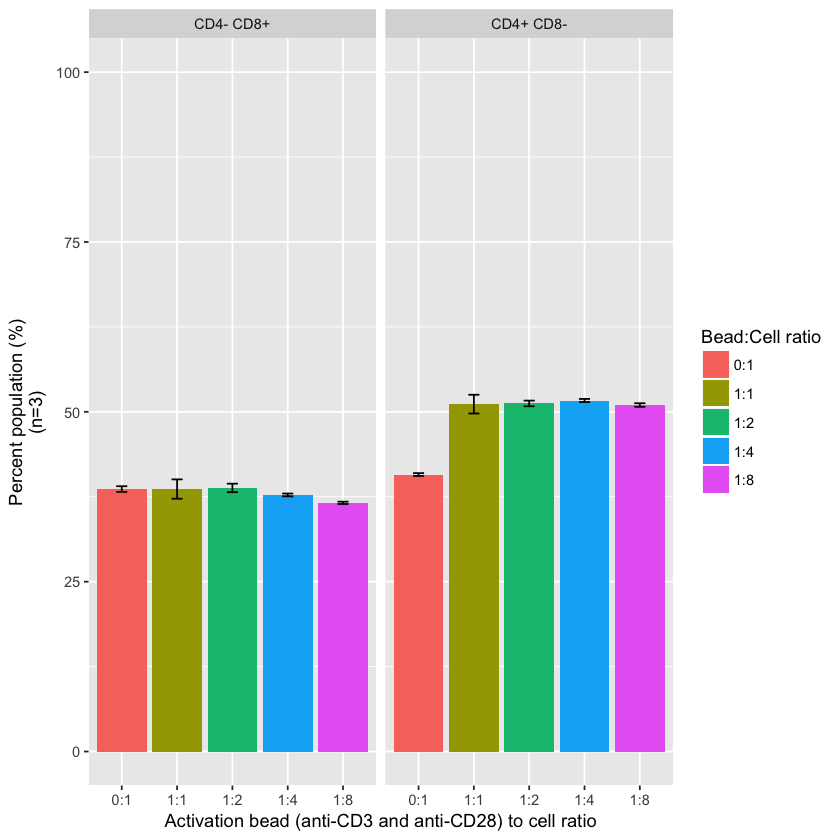

In [8]:
cd48_summary %>%
    ggplot(aes(x=`Bead:Cell ratio`, y=`Freq_mean`, fill=`Bead:Cell ratio`)) +
    geom_col() +
    geom_errorbar(
        aes(ymin=`Freq_mean`-`Freq_sd`, ymax=`Freq_mean`+`Freq_sd`),
        width=0.2
    ) +
    facet_wrap(~`Population`) +
    ylim(0, 100) +
    ylab('Percent population (%)\n(n=3)') +
    xlab('Activation bead (anti-CD3 and anti-CD28) to cell ratio')

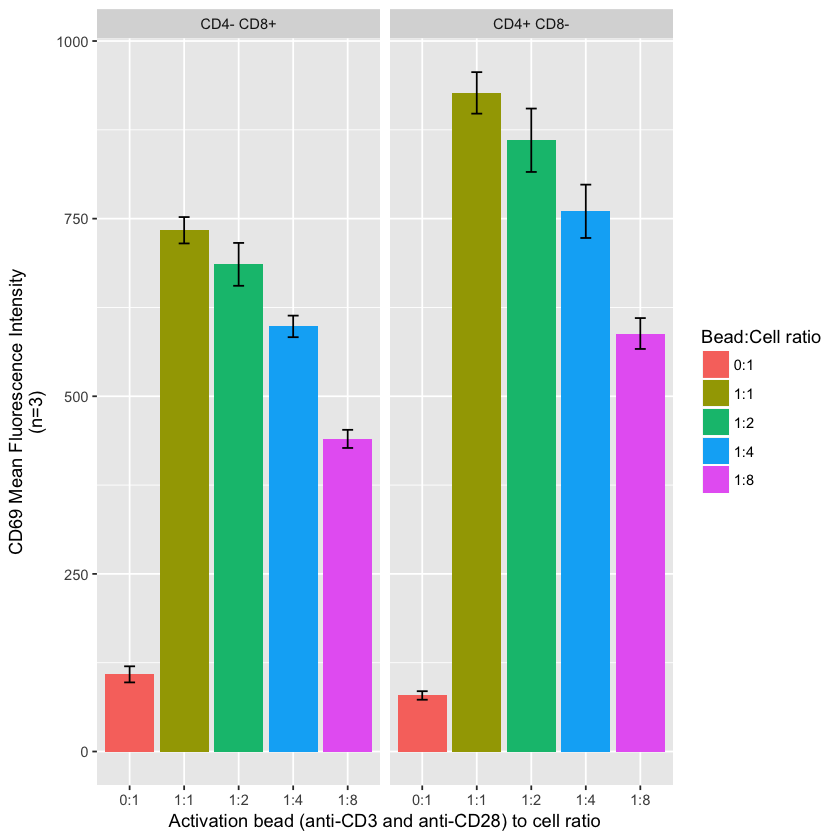

In [10]:
cd48_summary %>%
    ggplot(aes(x=`Bead:Cell ratio`, y=`CD96_mean`, fill=`Bead:Cell ratio`)) +
    geom_col() +
    geom_errorbar(
        aes(ymin=`CD96_mean`-`CD96_sd`, ymax=`CD96_mean`+`CD96_sd`),
        width=0.2
    ) +
    facet_wrap(~`Population`) +
    ylab('CD69 Mean Fluorescence Intensity\n(n=3)') +
    xlab('Activation bead (anti-CD3 and anti-CD28) to cell ratio')

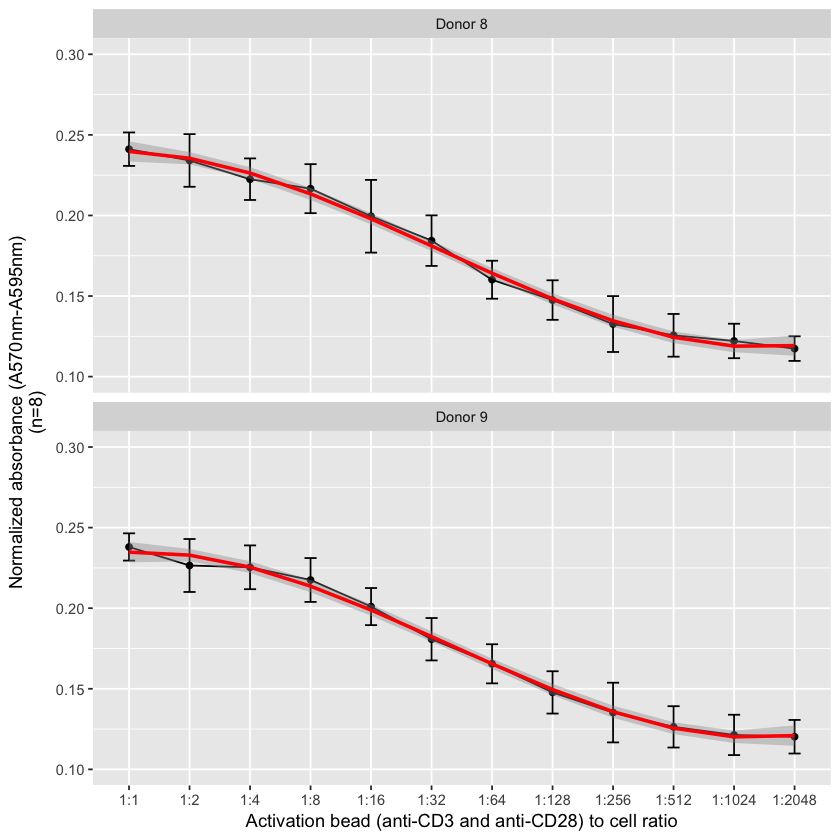

In [15]:
read_tsv(
    'proliferation_assay.tsv',
    col_types=cols(
        `Row`=col_factor(levels=LETTERS[1:8]),
        `Donor`=col_factor(levels=c("D8", "D9")),
        .default=col_double()
    )
) %>%
mutate(
    `Donor`=factor(`Donor`, labels=c("Donor 8", "Donor 9"))
) %>%
gather(
    key='Dilution',
    value='A570-A595',
    `1:1`:`1:2048`,
    factor_key=TRUE
) %>%
group_by(`Donor`, `Dilution`) %>%
summarize(
    `Norm_abs_mean`=mean(`A570-A595`),
    `Norm_abs_sd`=sd(`A570-A595`),
) %>%
ggplot(aes(x=`Dilution`, y=`Norm_abs_mean`, group=`Donor`)) +
    geom_point() +
    geom_line() +
    geom_errorbar(
        aes(ymin=`Norm_abs_mean`-`Norm_abs_sd`, ymax=`Norm_abs_mean`+`Norm_abs_sd`),
        width=0.2
    ) +
    geom_smooth(method="lm", colour="red", formula=y~I(x^3)+I(x^2)+x) +
    facet_wrap(~`Donor`, ncol=1) +
    ylim(0.1, .3) +
    xlab('Activation bead (anti-CD3 and anti-CD28) to cell ratio') +
    ylab('Normalized absorbance (A570nm-A595nm)\n(n=8)')

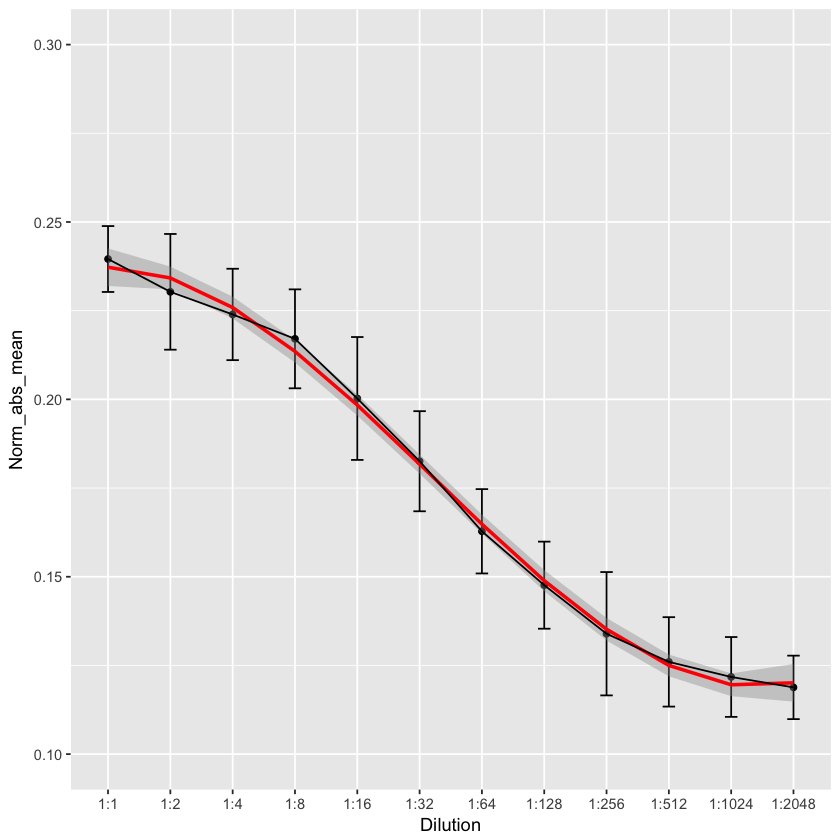

In [81]:
read_tsv(
    'proliferation_assay.tsv',
    col_types=cols(
        `Row`=col_factor(levels=c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')),
        `Donor`=col_factor(levels=c("D8", "D9")),
        .default=col_double()
    )
) %>%
gather(
    key='Dilution',
    value='A570-A595',
    `1:1`:`1:2048`,
    factor_key=TRUE
) %>%
group_by(`Dilution`) %>%
summarize(
    `Norm_abs_mean`=mean(`A570-A595`),
    `Norm_abs_sd`=sd(`A570-A595`),
) %>% 
ggplot(aes(x=`Dilution`, y=`Norm_abs_mean`, group=1)) +
    geom_point() +
    geom_errorbar(
        aes(ymin=`Norm_abs_mean`-`Norm_abs_sd`, ymax=`Norm_abs_mean`+`Norm_abs_sd`),
        width=0.2
    ) +
    geom_smooth(method="lm", colour="red", formula=y~I(x^3)+I(x^2)+x) +
    geom_line() +
    ylim(.1, .3)

In [40]:
?gather